In [1]:
import cv2

In [2]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [3]:
def detect_faces(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    return img

In [4]:
cap = cv2.VideoCapture(0)  # Запуск веб-камеры. 0 - это индекс камеры. Если у вас их несколько, можете попробовать 1, 2 и т. д.

while True:
    ret, frame = cap.read()  # Чтение кадра
    if not ret:
        break
    frame = cv2.flip(frame, flipCode = 1)
    frame = detect_faces(frame)  # Распознавание лиц
    cv2.imshow('Face Detection', frame)  # Отображение кадра

    if cv2.waitKey(1) & 0xFF == ord('q'):  # Закрыть окно при нажатии 'q'
        break


cap.release()
cv2.destroyAllWindows()

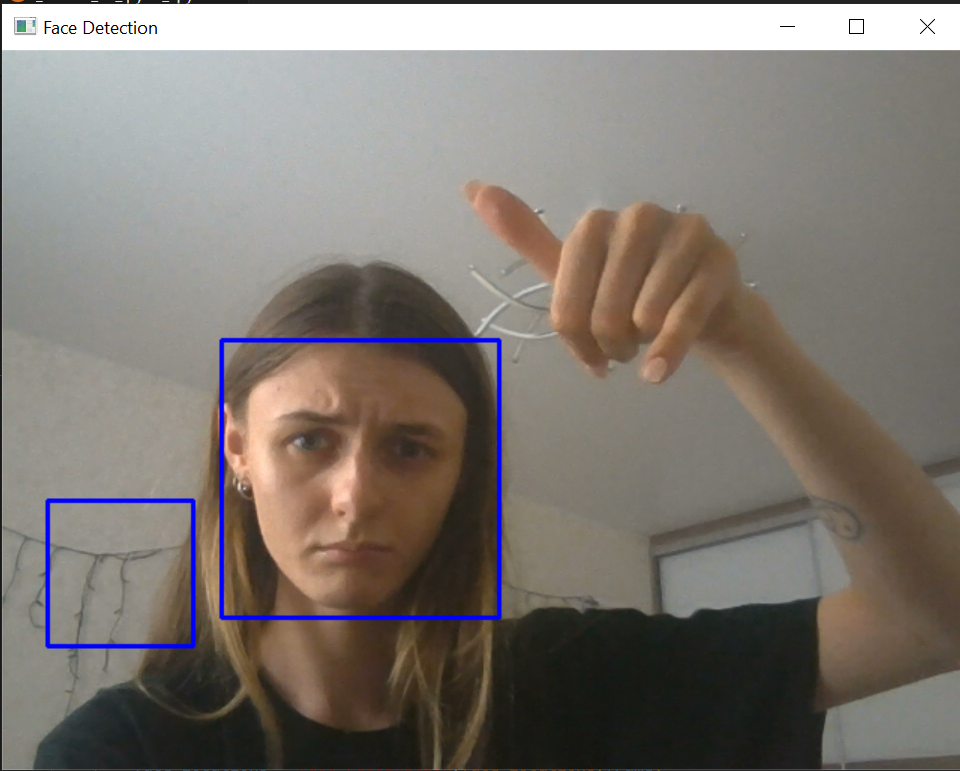

In [6]:
import face_recognition
import cv2

# Загрузите изображение с известным лицом
known_image = face_recognition.load_image_file("D:\Courses\DataScienceTMS\HW36\DSC03195.JPG")
known_face_encoding = face_recognition.face_encodings(known_image)[0]

# Инициализация веб-камеры
video_capture = cv2.VideoCapture(0)

while True:
    ret, frame = video_capture.read()
    
    frame = cv2.flip(frame, flipCode = 1)
    # Ищем лицо на кадре и извлекаем признаки
    face_locations = face_recognition.face_locations(frame)
    face_encodings = face_recognition.face_encodings(frame, face_locations)

    for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
        matches = face_recognition.compare_faces([known_face_encoding], face_encoding)
        name = "Unknown"

        if True in matches:
            name = "Ksyushik"

        cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)
        font = cv2.FONT_HERSHEY_DUPLEX
        cv2.putText(frame, name, (left + 6, bottom - 6), font, 0.5, (255, 255, 255), 1)

    cv2.imshow('Video', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

video_capture.release()
cv2.destroyAllWindows()


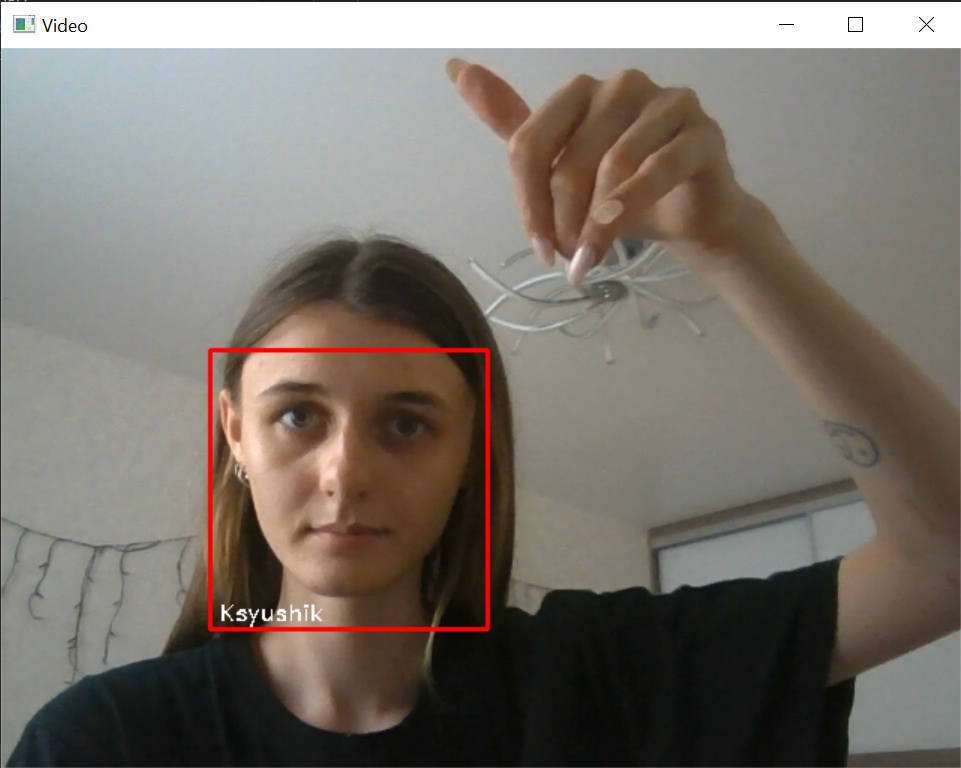

VGG-Face

In [7]:
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
# Загрузка модели VGG-Face
from keras.applications.vgg16 import VGG16

from keras.preprocessing import image
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
import matplotlib.pyplot as plt

In [8]:
base_model = VGG16(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc2').output)
# Загрузка изображения лица
img_path = 'D:\Courses\DataScienceTMS\HW36\DSC03195.JPG'
img = load_img(img_path, target_size=(224, 224))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Получение вектора признаков для лица
features = model.predict(x)

# Теперь вы можете использовать вектор признаков для сравнения с другими векторами
# или для классификации лиц, или для любых других задач, связанных с распознаванием лиц.


1/1 [==============================] - 1s 577ms/step


In [9]:
features.shape

(1, 4096)

1/1 [==============================] - 1s 576ms/step


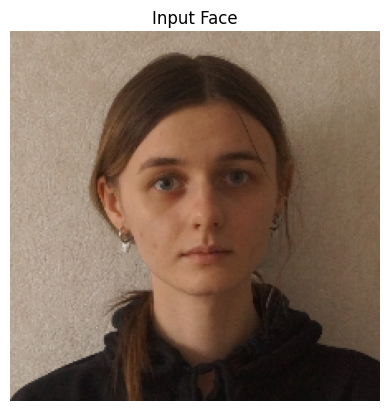

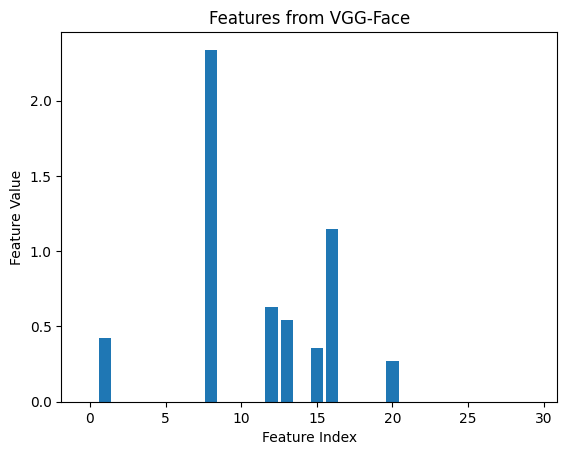

In [10]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Загрузка модели VGG-Face
base_model = VGG16(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc2').output)

# Загрузка и предварительная обработка изображения лица
img_path = 'D:\Courses\DataScienceTMS\HW36\DSC03195.JPG'
img = load_img(img_path, target_size=(224, 224))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Получение вектора признаков для лица
features = model.predict(x)

# Отображение изображения
plt.imshow(img)
plt.axis('off')
plt.title('Input Face')
plt.show()

# Отображение первых 30 признаков для наглядности (вы можете отобразить больше или меньше признаков)
plt.bar(range(30), features[0][:30])
plt.title('Features from VGG-Face')
plt.xlabel('Feature Index')
plt.ylabel('Feature Value')
plt.show()

# Извлечение ROI лица с использованием OpenCV:

In [11]:
import cv2

# Загрузите предварительно обученный каскадный классификатор лиц
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Чтение изображения
img = cv2.imread('D:\Courses\DataScienceTMS\HW36\DSC03210.JPG')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Детекция лица
faces = face_cascade.detectMultiScale(gray, 1.1, 4)
for (x, y, w, h) in faces:
    face_roi = img[y:y+h, x:x+w]  # извлекаем ROI лица для дальнейшего анализа


In [12]:
face_roi

array([[[ 51,  66,  92],
        [ 52,  67,  93],
        [ 54,  69,  95],
        ...,
        [ 31,  46,  65],
        [ 32,  46,  68],
        [ 34,  48,  70]],

       [[ 51,  66,  92],
        [ 53,  68,  94],
        [ 53,  68,  94],
        ...,
        [ 29,  44,  63],
        [ 32,  46,  68],
        [ 34,  48,  70]],

       [[ 52,  67,  93],
        [ 53,  68,  94],
        [ 53,  68,  94],
        ...,
        [ 28,  43,  62],
        [ 32,  46,  68],
        [ 33,  47,  69]],

       ...,

       [[139, 148, 158],
        [121, 130, 140],
        [100, 106, 117],
        ...,
        [ 31,  30,  39],
        [ 27,  26,  35],
        [ 25,  24,  33]],

       [[136, 145, 155],
        [117, 126, 136],
        [ 96, 102, 113],
        ...,
        [ 31,  30,  39],
        [ 27,  26,  35],
        [ 25,  24,  33]],

       [[131, 140, 150],
        [111, 120, 130],
        [ 89,  95, 106],
        ...,
        [ 29,  28,  37],
        [ 27,  26,  35],
        [ 25,  24,  33]]

In [14]:
face_img = cv2.resize(face_roi, (224, 224))
x = img_to_array(face_img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Извлечение дескрипторов лица
angry_features = model.predict(x)

1/1 [==============================] - 0s 227ms/step


In [15]:
np.save('D:\Courses\DataScienceTMS\HW36\me_angry.npy', angry_features)

In [16]:
# Загрузка сохраненных дескрипторов
saved_features = np.load('D:\Courses\DataScienceTMS\HW36\me_angry.npy')

## VGG-FACE

In [2]:
import cv2
import numpy as np
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.models import Model
from tensorflow.keras.preprocessing.image import img_to_array


# 1. Инициализация модели VGG-Face и извлечение слоя fc2
base_model = VGG16(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc2').output)

# 2. Функция для детекции и извлечения признаков лица
def get_face_features(img_path):
    # Детекция лица с использованием OpenCV
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    for (x, y, w, h) in faces:
        face_roi = img[y:y+h, x:x+w]

    face_img = cv2.resize(face_roi, (224, 224))
    x = img_to_array(face_img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = model.predict(x)
    return features

# 3. Сравнение признаков лица
def is_match(saved_features, new_features, threshold=10):
    distance = np.linalg.norm(saved_features - new_features)
    return distance < threshold

# 4. Демонстрация функциональности
saved_features = np.load('D:\Courses\DataScienceTMS\HW36\me_angry.npy')
new_image_path = "D:\Courses\DataScienceTMS\HW36\DSC03322.JPG"  # Замените на путь к новому изображению
new_features = get_face_features(new_image_path)

if is_match(saved_features, new_features):
    print("This is Ksyusha!")
else:
    print("This is not Ksyusha.")


1/1 [==============================] - 2s 2s/step
This is not Ksyusha.


1/1 [==============================] - 0s 311ms/step


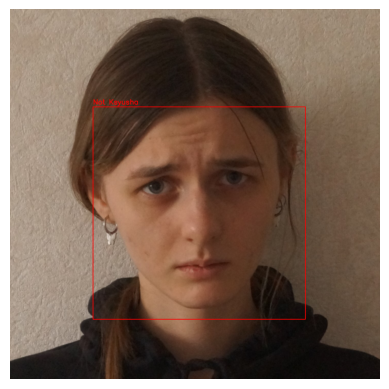

In [3]:
def display_image_with_results(img_path, features):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)

    for (x, y, w, h) in faces:
        if is_match(saved_features, features):
            cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
            cv2.putText(img, "Ksyusha", (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
        else:
            cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
            cv2.putText(img, "Not Ksyusha", (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2)

    # Если вы работаете в Jupyter Notebook:
    from matplotlib import pyplot as plt
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Конвертация из BGR в RGB для корректного отображения в matplotlib
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Теперь вызываем функцию:
new_image_path = "D:\Courses\DataScienceTMS\HW36\DSC03322.JPG"
new_features = get_face_features(new_image_path)
display_image_with_results(new_image_path, new_features)


1/1 [==============================] - 0s 405ms/step


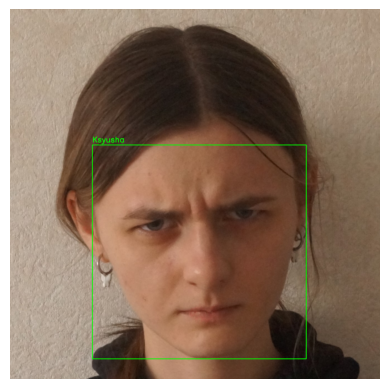

In [4]:
# Теперь вызываем функцию:
new_image_path = "D:\Courses\DataScienceTMS\HW36\DSC03210.JPG"
new_features = get_face_features(new_image_path)
display_image_with_results(new_image_path, new_features)

### RESNET50

In [14]:
import numpy as np
import cv2
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input
from keras.models import Model
from sklearn.preprocessing import normalize

# Создание базовой модели FaceNet
base_model = VGGFace(model='resnet50', include_top=False, input_shape=(224, 224, 3), pooling='avg')

def get_face_features(img_path):
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    face_img = cv2.resize(img_rgb, (224, 224))
    face_img = np.expand_dims(face_img, axis=0)
    face_img = face_img.astype('float32')  # Преобразование в float32
    face_img = preprocess_input(face_img, version=2)  # используем version=2, т.к. это ResNet-50
    return base_model.predict(face_img)

def is_match(features1, features2, threshold=0.5):
    # Нормализация векторов признаков
    features1_norm = normalize(features1.reshape(1, -1))
    features2_norm = normalize(features2.reshape(1, -1))
    
    # Вычисление косинусного расстояния
    cosine_similarity = np.dot(features1_norm, features2_norm.T)
    
    # Косинусное расстояние от -1 до 1 где 1 - полное совпадение, 0- ортогональность, а -1 - нет совпадений
    return cosine_similarity > threshold


In [15]:
def save_face_features(img_path, person_name):
    features = get_face_features(img_path)
    if features is not None:
        np.save(f'{person_name}_features.npy', features)

def load_face_features(person_name):
    return np.load(f'{person_name}_features.npy')

def display_image_with_results(img_path, features_dict):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)

    for (x, y, w, h) in faces:
        # Проверяем соответствие каждого дескриптора
        recognized_name = None
        for person_name, saved_features in features_dict.items():
            if is_match(saved_features, get_face_features(img_path)):
                recognized_name = person_name
                break

        if recognized_name:
            cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
            cv2.putText(img, recognized_name, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
        else:
            cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
            cv2.putText(img, "Not Recognized", (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2)

    # Если вы работаете в Jupyter Notebook:
    from matplotlib import pyplot as plt
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [16]:
# Сохраняем дескрипторы лица с именем
person_name = 'Ksyusha'
save_face_features('D:\Courses\DataScienceTMS\HW36\DSC03322.JPG', person_name)

1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 0s 208ms/step


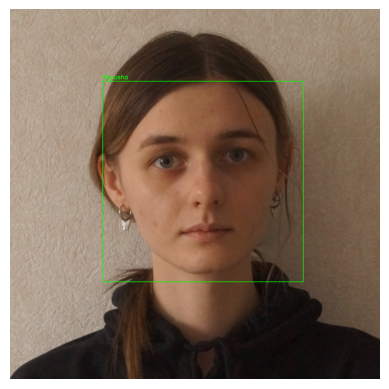

In [17]:
new_image_path = "D:\Courses\DataScienceTMS\HW36\DSC03195.JPG"
features_dict = {person_name: load_face_features(person_name)}
display_image_with_results(new_image_path, features_dict)

## Идентификация на видеопотоке 

In [18]:
import numpy as np
import cv2
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input
from sklearn.preprocessing import normalize
import os


base_model = VGGFace(model='resnet50', include_top=False, input_shape=(224, 224, 3), pooling='avg')

def get_face_features(img):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    face_img = cv2.resize(img_rgb, (224, 224))
    face_img = np.expand_dims(face_img, axis=0)
    face_img = face_img.astype('float32')  # Преобразование в float32
    face_img = preprocess_input(face_img, version=2)  # используем version=2, т.к. это ResNet-50
    return base_model.predict(face_img)

def is_match(features1, features2, threshold=0.5):
    # Нормализация векторов признаков
    features1_norm = normalize(features1.reshape(1, -1))
    features2_norm = normalize(features2.reshape(1, -1))
    
    # Вычисление косинусного расстояния
    cosine_similarity = np.dot(features1_norm, features2_norm.T)
    
    # Косинусное расстояние от -1 до 1 где 1 - полное совпадение, 0- ортогональность, а -1 - нет совпадений
    return cosine_similarity > threshold

In [27]:
def save_face_features(img_path, person_name):
    img = cv2.imread(img_path)
    features = get_face_features(img)
    if features is not None:
        np.save(f'{person_name}_features.npy', features)

def load_face_features(person_name):
    return np.load(f'{person_name}_features.npy')

def recognize_faces_in_frame(frame, features_dict, threshold=0.5):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    
    recognized_faces = []
    for (x, y, w, h) in faces:
        face = frame[y:y+h, x:x+w]
        features = get_face_features(face)
        
        recognized_name = None
        for person_name, saved_features in features_dict.items():
            if is_match(saved_features, features, threshold):
                recognized_name = person_name
                break
        
        recognized_faces.append((x, y, w, h, recognized_name))
    
    return recognized_faces

def display_recognition_results(frame, recognized_faces):
    for (x, y, w, h, name) in recognized_faces:
        if name:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
            cv2.putText(frame, name, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
        else:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255), 2)
            cv2.putText(frame, "Not Recognized", (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2)

def recognize_faces_in_video(video_path, features_dict, output_size=(640, 480), threshold=0.5):
    cap = cv2.VideoCapture(video_path)
    
    if not cap.isOpened():
        print(f"Error: Could not open video file {video_path}")
        return
    
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        
        frame = cv2.resize(frame, output_size)
        recognized_faces = recognize_faces_in_frame(frame, features_dict, threshold)
        display_recognition_results(frame, recognized_faces)
        
        cv2.imshow('Video', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

def recognize_faces_in_camera(features_dict, threshold=0.5):
    cap = cv2.VideoCapture(0)
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        
        frame = cv2.flip(frame, flipCode = 1)

        recognized_faces = recognize_faces_in_frame(frame, features_dict, threshold)
        display_recognition_results(frame, recognized_faces)
        
        cv2.imshow('Camera', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

In [20]:
person_name = 'Ksyusha'
save_face_features('D:/Courses/DataScienceTMS/HW36/DSC03322.JPG', person_name)

1/1 [==============================] - 1s 1s/step


In [ ]:
features_dict = {person_name: load_face_features(person_name)}

video_path = "D:\Courses\DataScienceTMS\HW36\me.MP4"
recognize_faces_in_video(video_path, features_dict)

In [ ]:
recognize_faces_in_camera(features_dict)

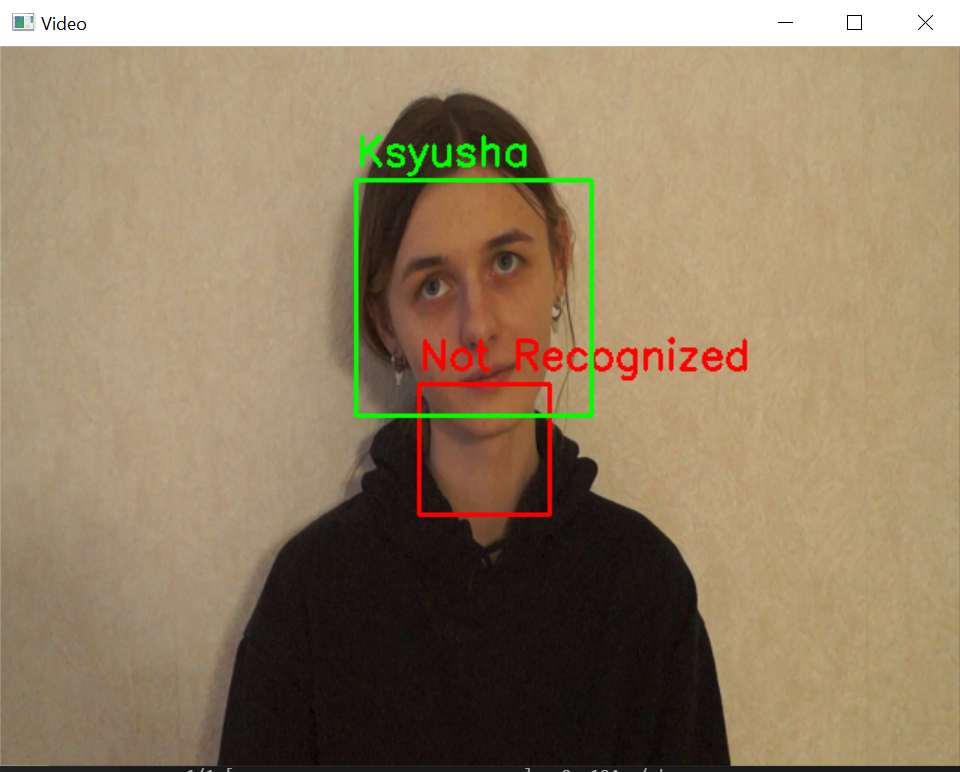

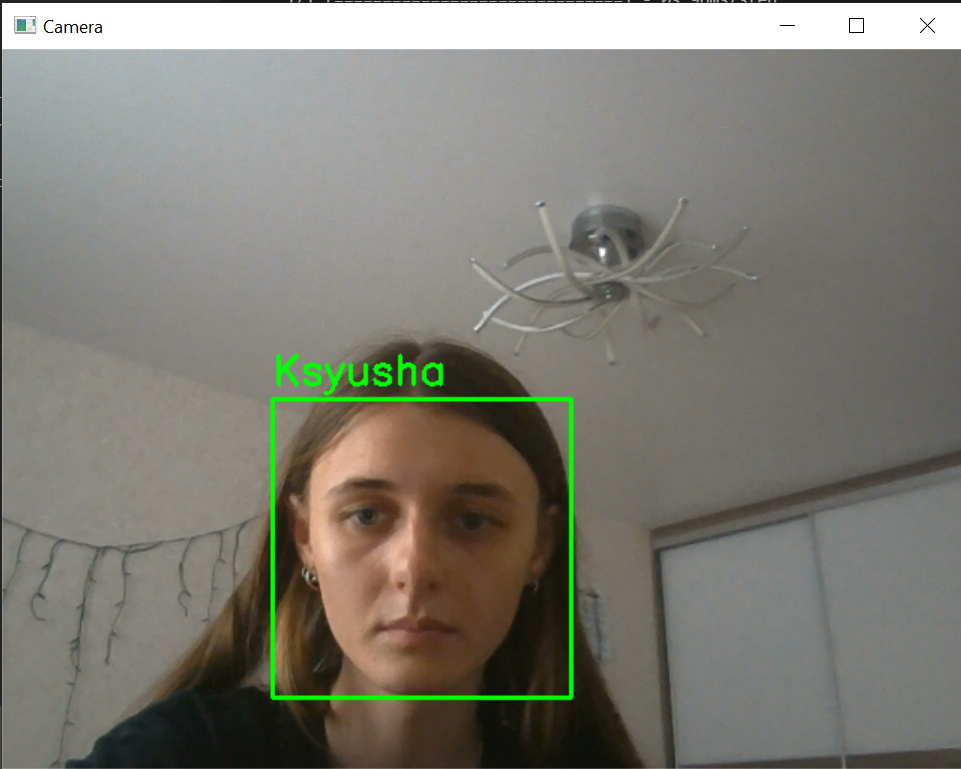